In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report

In [51]:
dt = pd.read_csv("diabetes_dataset.csv")
dt

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


In [52]:
X = dt.iloc[:,0:16]
y = dt.iloc[:,16:]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [54]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [55]:
X_test_std = sc.fit_transform(X_test)

In [56]:
pca = PCA(n_components=2)

In [57]:
X_pca = pca.fit_transform(X)

C:\Users\Krish\AppData\Local\Temp\ipykernel_24104\2544616143.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis')


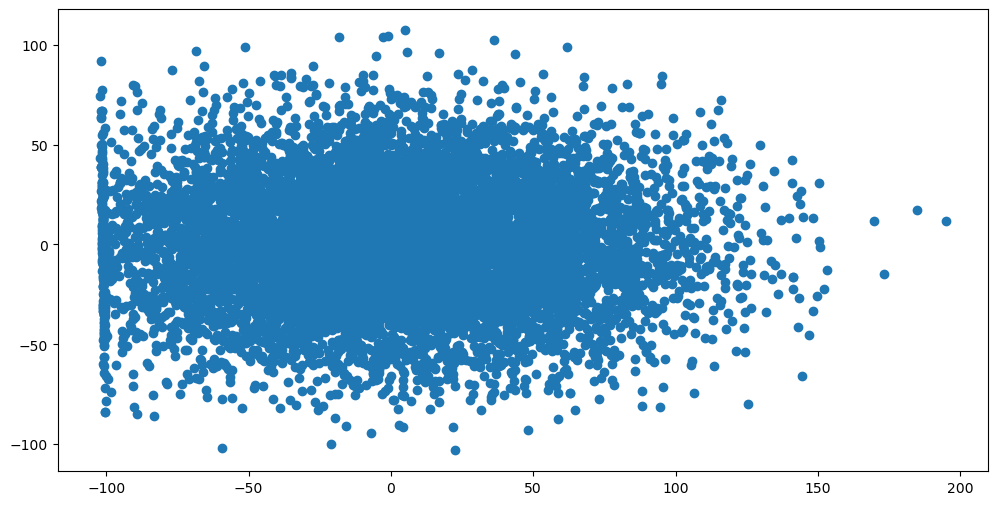

In [58]:
plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='viridis')

In [63]:
svc1 = SVC(kernel="linear")
svc2 = SVC(kernel="rbf")

In [66]:
svc1.fit(X_train_std,y_train)
svc2.fit(X_train_std,y_train)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [74]:
y_pred_linear_train = svc1.predict(X_train_std)
y_pred_rbf_train = svc2.predict(X_train_std)
y_pred_linear = svc1.predict(X_test_std)
y_pred_rbf = svc2.predict(X_test_std)

In [75]:
linear_accuracy = accuracy_score(y_test,y_pred_linear)
linear_accuracy_train = accuracy_score(y_train,y_pred_linear_train)
rbf_accuracy = accuracy_score(y_test,y_pred_rbf)
rbf_accuracy_train = accuracy_score(y_train,y_pred_rbf_train)

print(f"linear accuracy_test : {linear_accuracy} , linear accuracy_train : {linear_accuracy_train}")
print(f"rbf accuracy_test : {rbf_accuracy} , rbf accuracy_train : {rbf_accuracy_train}")

linear accuracy_test : 0.9923130677847659 , linear accuracy_train : 0.9959556620730977
rbf accuracy_test : 0.9877707896575821 , rbf accuracy_train : 0.9922109047333733
